In [72]:
import time
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings('ignore')
print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('dirty_cafe_sales.csv') # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())
print("\nData Types:======================================")
print(df.dtypes)

Loading data file now, this could take a while depending on file size
Loading took 0.01 seconds

Missing values: 6826
Duplicated values: 0

Missing values by column:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Unique Values in Each Column:
Transaction ID      10000
Item                   10
Quantity                7
Price Per Unit          8
Total Spent            19
Payment Method          5
Location                4
Transaction Date      367
dtype: int64

Data Types:======================================
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object


In [73]:
df.replace(['ERROR', 'UNKNOWN'], np.nan, inplace=True)


payment_mode = df['Payment Method'].mode()[0]
df['Payment Method'].fillna(payment_mode, inplace=True)

In [74]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')


df['Year'] = df['Transaction Date'].dt.year
df['Month'] = df['Transaction Date'].dt.month
df['Day'] = df['Transaction Date'].dt.day
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()
df = df.drop(columns=['Transaction Date'])

In [75]:
most_frequent_item = df['Item'].mode()[0]
df['Item'] = df['Item'].fillna(most_frequent_item)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_categorical_distributions(Categorical_Columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(Categorical_Columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    plt.tight_layout()
    plt.show()
    print(df[Categorical_Columns].value_counts())

In [77]:
def plot_top_categories_bar_charts(column_name, data=df, palette='viridis', t_top=10):
    top_categories = data[column_name].value_counts().nlargest(t_top)

    plt.figure(figsize=(6, 3))
    sns.barplot(
        y=top_categories.index, 
        x=top_categories.values, 
        palette=palette
    )
    plt.title(f'Top {t_top} Categories in {column_name}')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()

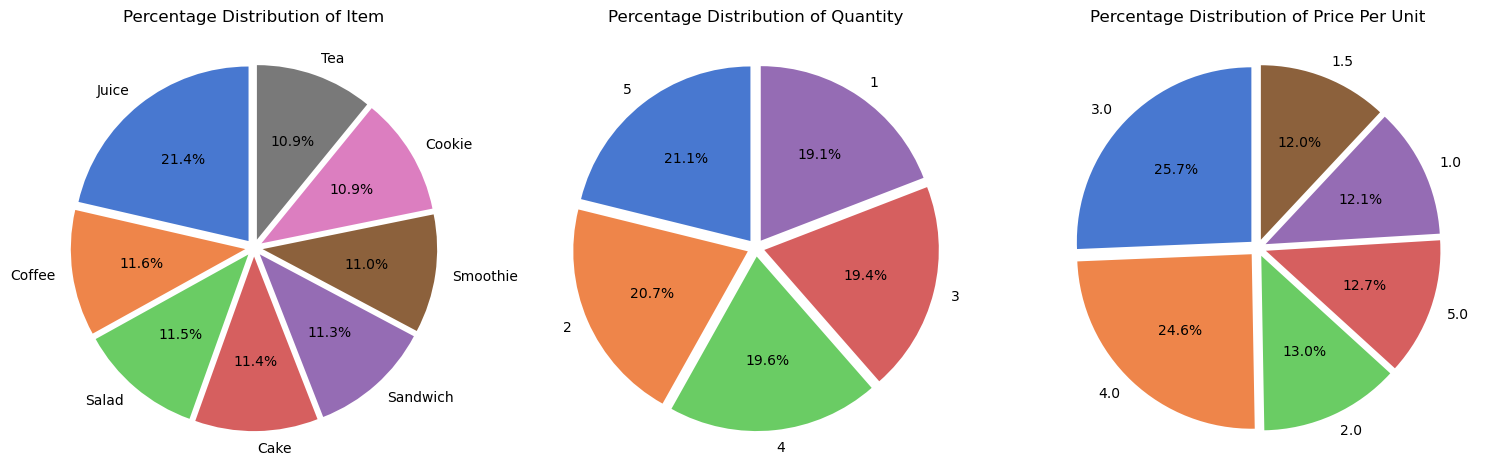

Item   Quantity  Price Per Unit
Juice  3         3.0               275
       2         3.0               267
       5         3.0               252
       4         3.0               251
       1         3.0               245
                                  ... 
       4         2.0                20
       5         2.0                18
                 1.5                17
       4         1.5                15
       1         1.5                13
Name: count, Length: 65, dtype: int64


In [78]:
columns_to_plot = ['Item','Quantity','Price Per Unit']
plot_categorical_distributions(columns_to_plot)

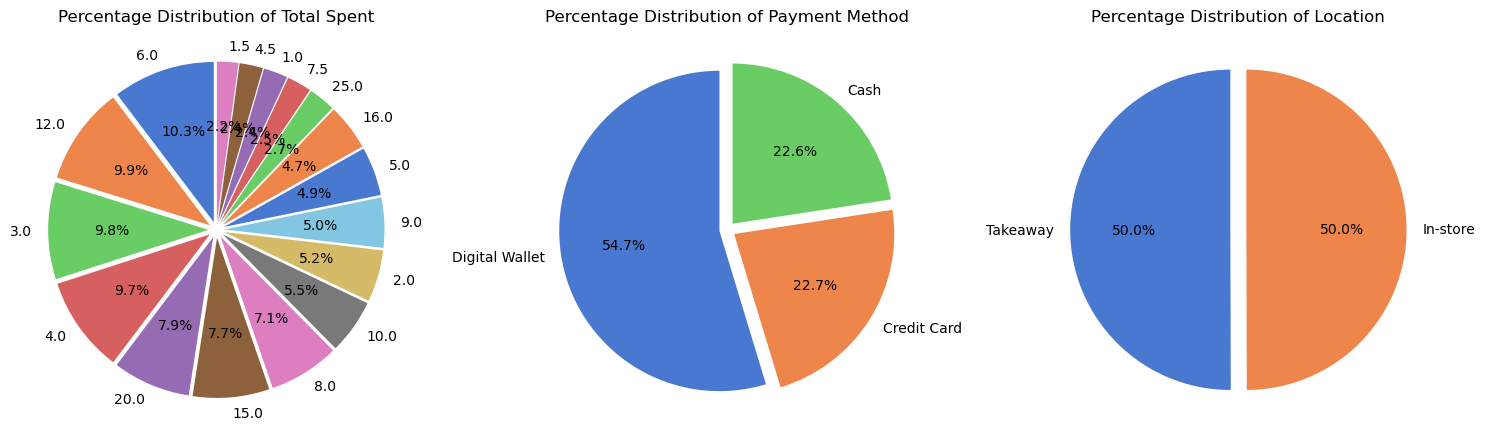

Total Spent  Payment Method  Location
4.0          Digital Wallet  Takeaway    168
12.0         Digital Wallet  Takeaway    164
                             In-store    161
6.0          Digital Wallet  In-store    159
                             Takeaway    159
                                        ... 
7.5          Cash            In-store     14
1.0          Cash            Takeaway     12
4.5          Credit Card     Takeaway     12
1.5          Credit Card     In-store     10
             Cash            Takeaway      8
Name: count, Length: 102, dtype: int64


In [79]:
columns_to_plot = ['Total Spent','Payment Method','Location']
plot_categorical_distributions(columns_to_plot)

## Quantity x Price Per Unit = Total Spent

In [80]:
df.isna().sum()

Transaction ID       0
Item                 0
Quantity           479
Price Per Unit     533
Total Spent        502
Payment Method       0
Location          3961
Year               460
Month              460
Day                460
DayOfWeek          460
dtype: int64

In [81]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')


df['Total Spent'] = df.apply(lambda row: row['Quantity'] * row['Price Per Unit'] if pd.isna(row['Total Spent']) else row['Total Spent'], axis=1)
df['Quantity'] = df.apply(lambda row: row['Total Spent'] / row['Price Per Unit'] if pd.isna(row['Quantity']) else row['Quantity'], axis=1)
df['Price Per Unit'] = df.apply(lambda row: row['Total Spent'] * row['Quantity'] if pd.isna(row['Price Per Unit']) else row['Price Per Unit'], axis=1)
df.head()
df.head()
df.isna().sum()

Transaction ID       0
Item                 0
Quantity            38
Price Per Unit      38
Total Spent         40
Payment Method       0
Location          3961
Year               460
Month              460
Day                460
DayOfWeek          460
dtype: int64

In [82]:
df['Quantity'] = df['Quantity'].apply(lambda x: np.random.randint(2, 5) if pd.isna(x) else x)
df['Price Per Unit'] = df['Price Per Unit'].apply(lambda x: np.random.randint(2, 5) if pd.isna(x) else x)
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Year,Month,Day,DayOfWeek
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023.0,9.0,8.0,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023.0,5.0,16.0,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023.0,7.0,19.0,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,NaN,2023.0,4.0,27.0,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023.0,6.0,11.0,Sunday


In [83]:
most_frequent_item = df['Year'].mode()[0]
df['Year'] = df['Year'].fillna(most_frequent_item)

In [84]:
df['Month'] = df['Month'].apply(lambda x: np.random.randint(1, 13) if pd.isna(x) else x)
df['Day'] = df['Day'].apply(lambda x: np.random.randint(1, 31) if pd.isna(x) else x)

In [85]:
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df = df.fillna({'DayOfWeek': df['DayOfWeek'].bfill()})

In [86]:
print(df.isnull().sum())
print("======================================")
print(df.dtypes)


Transaction ID     0
Item               0
Quantity           0
Price Per Unit     0
Total Spent       40
Payment Method     0
Location           0
Year               0
Month              0
Day                0
DayOfWeek          0
dtype: int64
Transaction ID     object
Item               object
Quantity          float64
Price Per Unit    float64
Total Spent       float64
Payment Method     object
Location           object
Year              float64
Month             float64
Day               float64
DayOfWeek          object
dtype: object


In [87]:
def plot_categorical_relationships(Categorical_Columns='column', data=df, Numerical_Columns='', title_prefix='Relationship'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_data = data.groupby(Categorical_Columns)[Numerical_Columns].mean().sort_values(ascending=False)
    sns.barplot(x=avg_data.index, y=avg_data.values, palette='muted')
    plt.title(f'{title_prefix} - Average {Numerical_Columns} by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(f'Average {Numerical_Columns}')
    plt.xticks(rotation=45)
    
    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Distribution by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=Categorical_Columns, y=Numerical_Columns, data=data, palette='muted')
    plt.title(f'{title_prefix} - {Numerical_Columns} Violin Plot by {Categorical_Columns}')
    plt.xlabel(Categorical_Columns)
    plt.ylabel(Numerical_Columns)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()



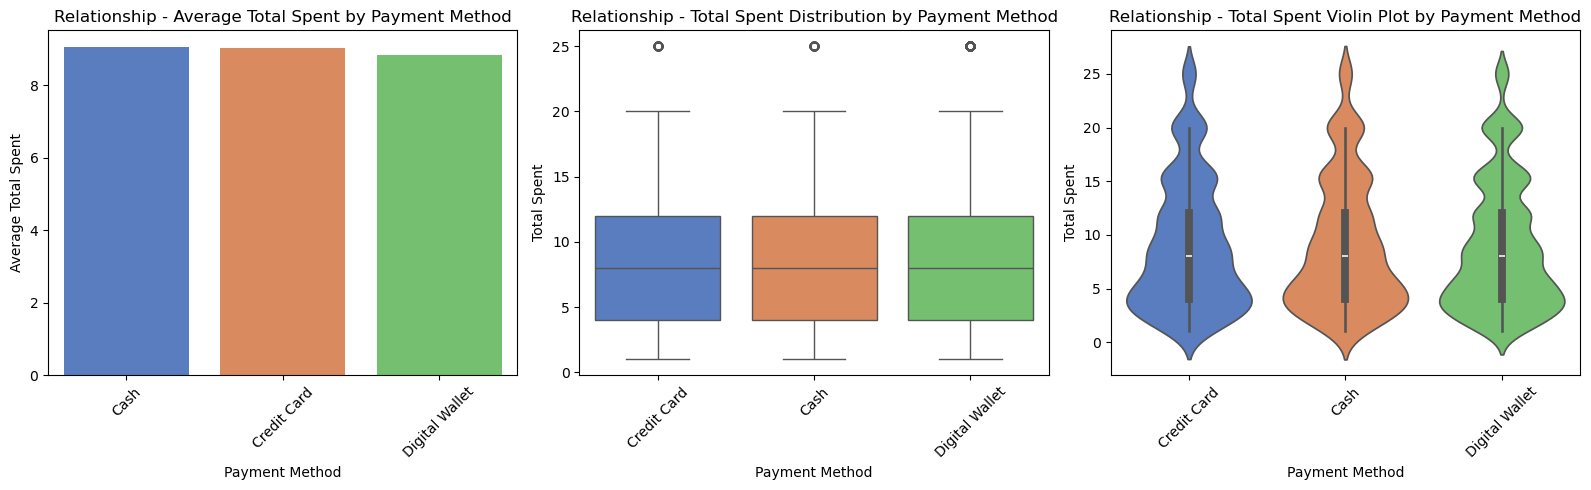

In [88]:
target_Numerical_Columns = ['Total Spent']
for column in target_Numerical_Columns:
    plot_categorical_relationships(Categorical_Columns='Payment Method', Numerical_Columns=column)

In [89]:
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Year,Month,Day,DayOfWeek
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023.0,9.0,8.0,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023.0,5.0,16.0,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023.0,7.0,19.0,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023.0,4.0,27.0,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023.0,6.0,11.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023.0,8.0,30.0,Wednesday
9996,TXN_9659401,Juice,3.0,9.0,3.0,Digital Wallet,Takeaway,2023.0,6.0,2.0,Friday
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023.0,3.0,2.0,Thursday
9998,TXN_7695629,Cookie,3.0,9.0,3.0,Digital Wallet,Takeaway,2023.0,12.0,2.0,Saturday


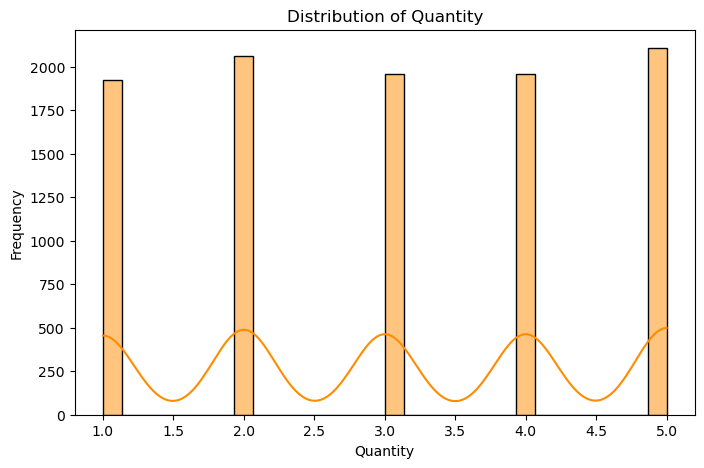

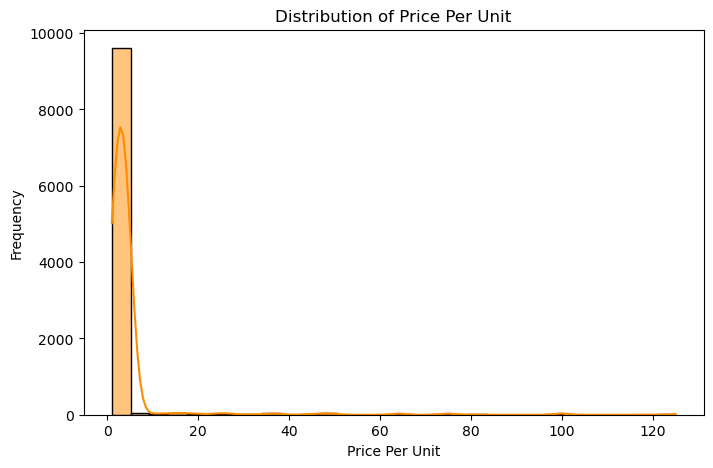

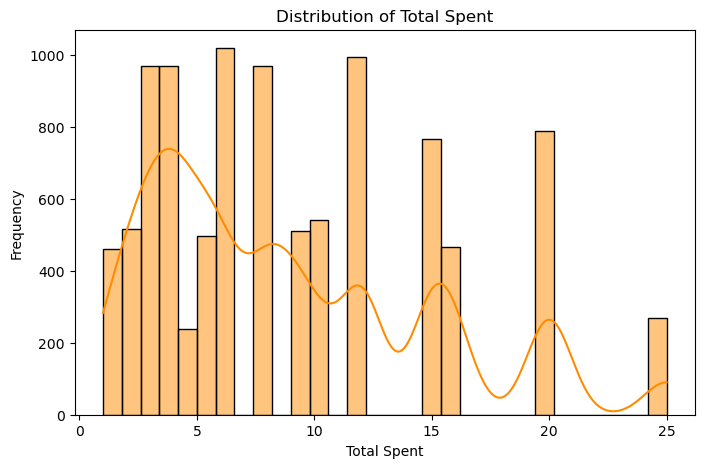

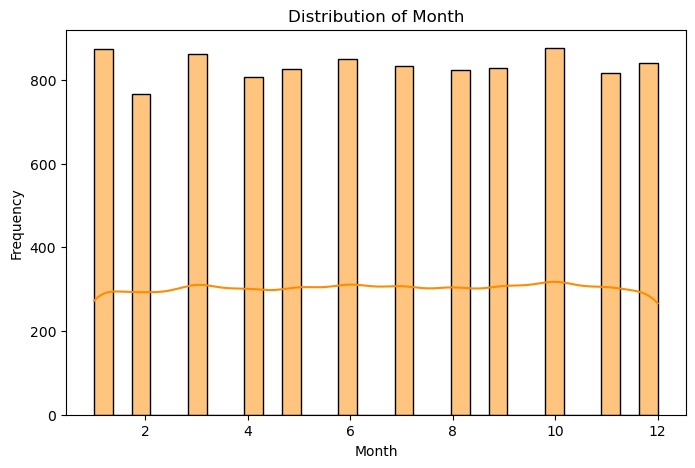

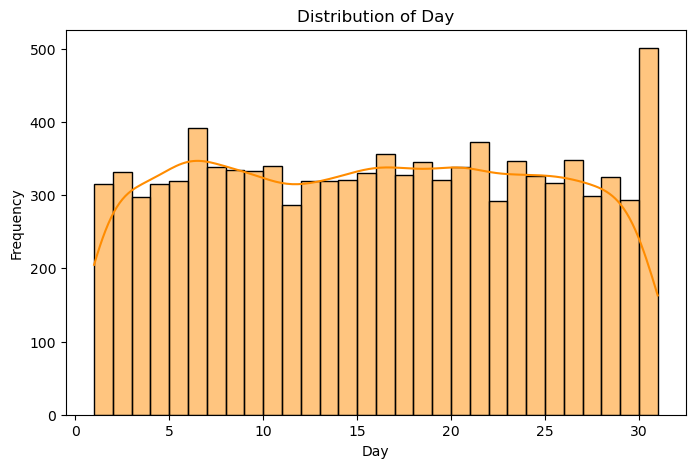

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='#ff8c00')  
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Month','Day']
plot_histograms(df, numerical_columns)

In [91]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']
Categorical Columns: ['Transaction ID', 'Item', 'Payment Method', 'Location', 'DayOfWeek']


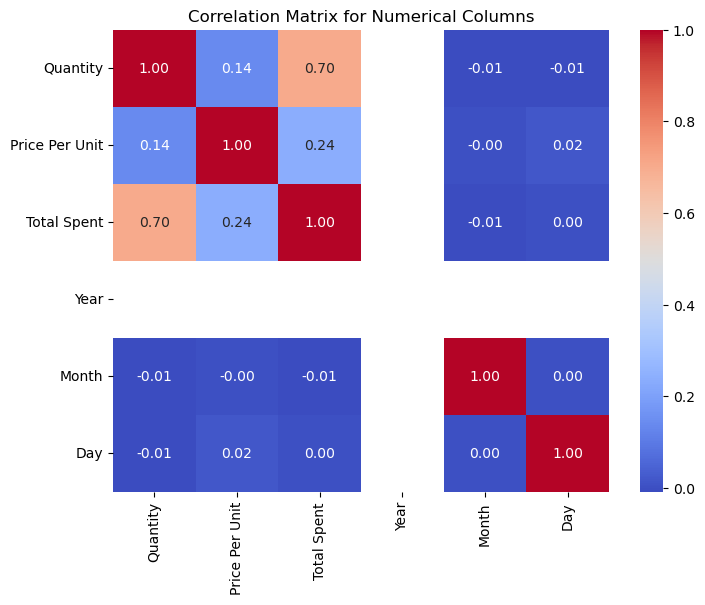

In [92]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [101]:
# List of numerical columns
numerical_columns = ['Quantity', 'Price Per Unit', 'Total Spent', 'Year', 'Month', 'Day']


def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.20)
        Q3 = df[col].quantile(0.80)
        IQR = Q3 - Q1
        

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply the function to remove outliers
df = remove_outliers_iqr(df, numerical_columns)

print(df.head(),"\n")
print(df.isna().sum())

  Transaction ID    Item  Quantity  Price Per Unit  Total Spent  \
0    TXN_1961373  Coffee       2.0             2.0          4.0   
1    TXN_4977031    Cake       4.0             3.0         12.0   
2    TXN_4271903  Cookie       4.0             1.0          4.0   
3    TXN_7034554   Salad       2.0             5.0         10.0   
4    TXN_3160411  Coffee       2.0             2.0          4.0   

   Payment Method  Location    Year  Month   Day  DayOfWeek  
0     Credit Card  Takeaway  2023.0    9.0   8.0     Friday  
1            Cash  In-store  2023.0    5.0  16.0    Tuesday  
2     Credit Card  In-store  2023.0    7.0  19.0  Wednesday  
3  Digital Wallet  Takeaway  2023.0    4.0  27.0   Thursday  
4  Digital Wallet  In-store  2023.0    6.0  11.0     Sunday   

Transaction ID    0
Item              0
Quantity          0
Price Per Unit    0
Total Spent       0
Payment Method    0
Location          0
Year              0
Month             0
Day               0
DayOfWeek         0
dty